# Hello Soft Clustering (GMM)

### T1. Using 3 mixtures, initialize your Gaussian with means (3,3), (2,2), and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mix- ture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration. (You may do the calculations by hand or write code to do so)



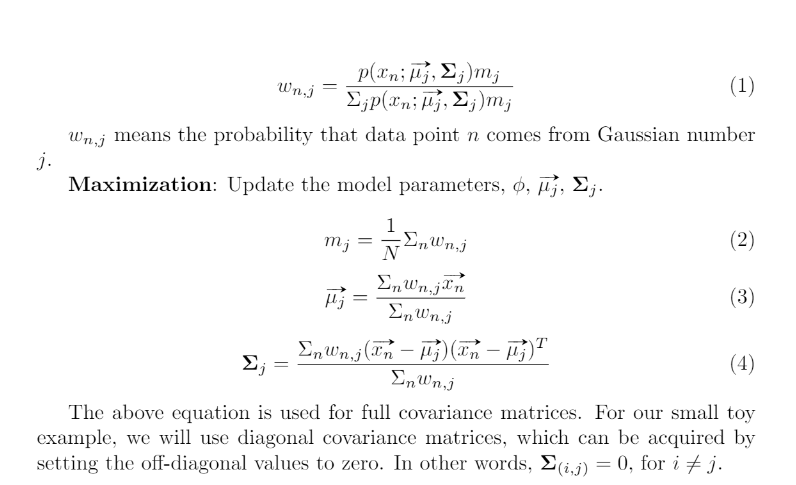

## TODO: Complete functions below including
- Fill relevant parameters in each function.
- Implement computation and return values.

These functions will be used in T1-4.

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy import linalg as LA
import scipy.io
import matplotlib.image as mpimg
from skimage import img_as_float

In [226]:
class GMM:
    def __init__(self, mixture_weight, mean_params, cov_params):
        self.mixture_weight = mixture_weight
        self.mean_params = mean_params
        self.cov_params = cov_params
        self.n_iter = 0

    def estimation_step(self, data):
        w=[]
        for i in range(len(self.mean_params)):
            w.append(multivariate_normal.pdf(data,self.mean_params[i],self.cov_params[i]) * self.mixture_weight[i])
        w=np.array(w)
        sum=np.sum(w,axis=0)
        for i in range(len(self.mean_params)):
            w[i]/=sum
        return w

    def maximization_step(self, data, w):
        for i in range(len(self.mean_params)):#update weight
            self.mixture_weight[i]=np.sum(w[i])/len(data)
        
            self.mean_params[i]=np.dot(w[i],data)/np.sum(w[i])
        
            diff = data - self.mean_params[i]
            self.cov_params[i] = np.dot((w[i][:, np.newaxis] * diff).T, diff) / np.sum(w[i])
            self.cov_params[i][0,1]=0
            self.cov_params[i][1,0]=0

    def find_P(self,x,weight,mean,cov):
        result=0
        for i in range(len(mean)):
            result+=(weight[i] * multivariate_normal.pdf(x,mean[i],cov[i]))   
        return result
    
    def get_log_likelihood(self, data):
        log_prob=1
        for x in data:
            log_prob*=(self.find_P(x,self.mixture_weight,self.mean_params,self.cov_params))
        
        log_prob=np.log(log_prob)
        return log_prob

    def print_iteration(self,data):
        print("m :\n", self.mixture_weight)
        print("mu :\n", self.mean_params)
        print("covariance matrix :\n", self.cov_params)
        self.plot(data)
        print("-------------------------------------------------------------")
    
    def plot(self,data):
        plt.figure(figsize=(8, 6))
        plt.scatter(data[:,0],data[:,1])
        for j in range(len(self.mean_params)):
            x = np.linspace(self.mean_params[j][0] - 3 * np.sqrt(self.cov_params[j][0][0]), self.mean_params[j][0] + 3 * np.sqrt(self.cov_params[j][0][0]), 100)
            y = np.linspace(self.mean_params[j][1] - 3 * np.sqrt(self.cov_params[j][1][1]), self.mean_params[j][1] + 3 * np.sqrt(self.cov_params[j][1][1]), 100)
            X, Y = np.meshgrid(x, y)
            pos = np.empty(X.shape + (2,))
            pos[:, :, 0] = X; pos[:, :, 1] = Y
            plt.contour(X, Y, multivariate_normal.pdf(pos,self.mean_params[j], self.cov_params[j]))
        plt.grid(True)
        plt.show()

    def perform_em_iterations(self, data, num_iterations, display=True):
        log_prob_list = []

        # Display initialization.
        if display:
            print("Initialization")
            self.print_iteration(data)

        for n_iter in range(num_iterations):

            # TODO: Perform EM step.

            # INSERT CODE HERE

            self.maximization_step(data,self.estimation_step(data))

            # Calculate log prob.
            log_likelihood = self.get_log_likelihood(data)
            log_prob_list.append(log_likelihood)

            # Display each iteration.
            if display:
                print(f"Iteration: {n_iter}")
                self.print_iteration(data)

        return log_prob_list

Initialization
m :
 [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
mu :
 [[ 3.  3.]
 [ 2.  2.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]


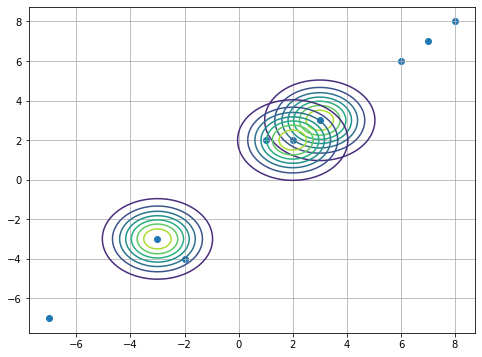

-------------------------------------------------------------
Iteration: 0
m :
 [0.45757241940119386, 0.20909424706571342, 0.33333333353309275]
mu :
 [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
covariance matrix :
 [[[4.53619412 0.        ]
  [0.         4.28700611]]

 [[0.51645579 0.        ]
  [0.         0.13152618]]

 [[4.66666668 0.        ]
  [0.         2.88888891]]]


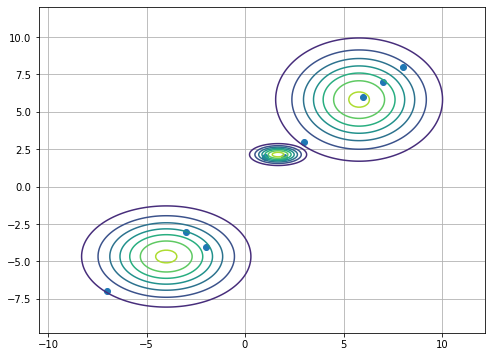

-------------------------------------------------------------
Iteration: 1
m :
 [0.40711618315944753, 0.25954960846072456, 0.3333342083798279]
mu :
 [[ 6.27176215  6.27262711]
 [ 1.72091544  2.14764812]
 [-3.99998589 -4.6666488 ]]
covariance matrix :
 [[[2.94672736 0.        ]
  [0.         2.93847196]]

 [[0.49649261 0.        ]
  [0.         0.12584815]]

 [[4.66673088 0.        ]
  [0.         2.88900236]]]


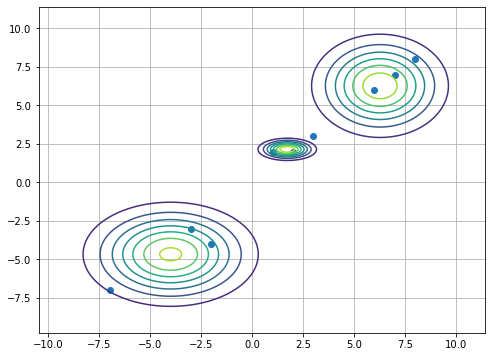

-------------------------------------------------------------
Iteration: 2
m :
 [0.3607090863887185, 0.30595677269265115, 0.33333414091863034]
mu :
 [[ 6.6962644   6.69629468]
 [ 1.91071238  2.27383436]
 [-3.99998673 -4.6666501 ]]
covariance matrix :
 [[[1.73961067 0.        ]
  [0.         1.73929602]]

 [[0.62898406 0.        ]
  [0.         0.1988491 ]]

 [[4.66672942 0.        ]
  [0.         2.88899545]]]


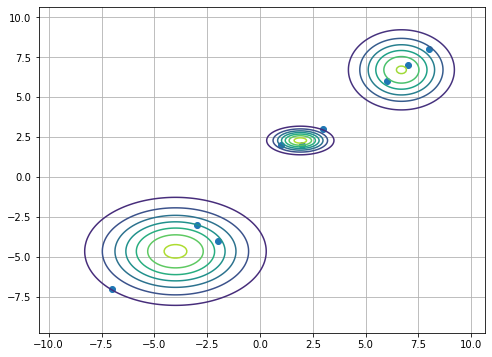

-------------------------------------------------------------


In [227]:
num_iterations = 3
num_mixture = 3
mixture_weight = [1/3] * num_mixture # m
mean_params = np.array([[3,3], [2,2], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.vstack([X,Y]).T

gmm = GMM(mixture_weight, mean_params, cov_params)
log_prob_list = gmm.perform_em_iterations(data, num_iterations)

### T2. Plot the log likelihood of the model given the data after each EM step. In other words, plot $\log \prod_n p( \vec{x_n} |φ, \vec{μ} , Σ)$. Does it goes up every iteration just as we learned in class?



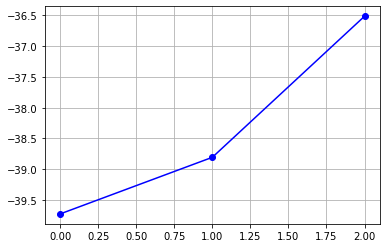

In [228]:
# TODO
plt.plot(np.arange(len(log_prob_list)),log_prob_list,color="blue",marker="o")
plt.grid(True)
plt.show()

    ANS : Yes,it does.

### T3. Using 2 mixtures, initialize your Gaussian with means (3,3) and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mixture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration.



Initialization
m :
 [0.3333333333333333, 0.3333333333333333]
mu :
 [[ 3.  3.]
 [-3. -3.]]
covariance matrix :
 [[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]


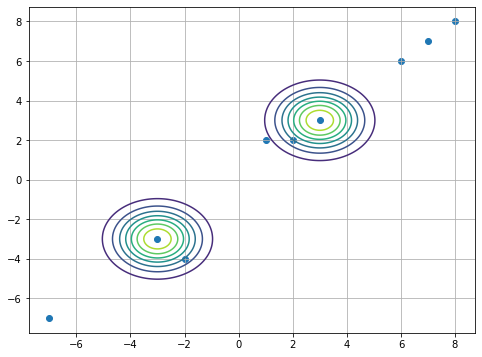

-------------------------------------------------------------
Iteration: 0
m :
 [0.6666666649702522, 0.3333333350297478]
mu :
 [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
covariance matrix :
 [[[6.91666665 0.        ]
  [0.         5.88888889]]

 [[4.66666677 0.        ]
  [0.         2.8888891 ]]]


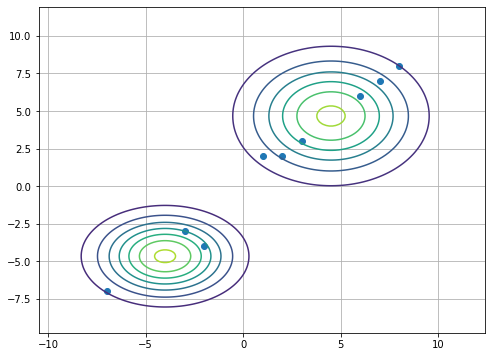

-------------------------------------------------------------
Iteration: 1
m :
 [0.6666943621060054, 0.3333056378939946]
mu :
 [[ 4.49961311  4.66620178]
 [-3.99993241 -4.66651231]]
covariance matrix :
 [[[6.91944755 0.        ]
  [0.         5.89275124]]

 [[4.66806942 0.        ]
  [0.         2.89103318]]]


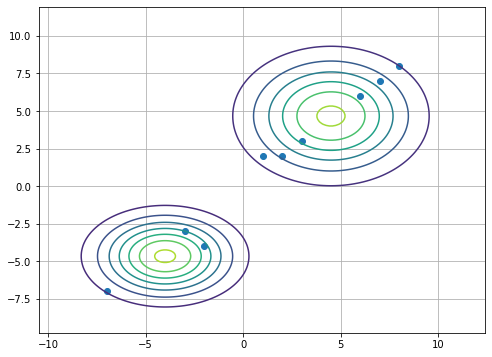

-------------------------------------------------------------
Iteration: 2
m :
 [0.6666945259520648, 0.3333054740479351]
mu :
 [[ 4.49961084  4.66619903]
 [-3.99993206 -4.66651141]]
covariance matrix :
 [[[6.91946372 0.        ]
  [0.         5.8927741 ]]

 [[4.66807754 0.        ]
  [0.         2.89104566]]]


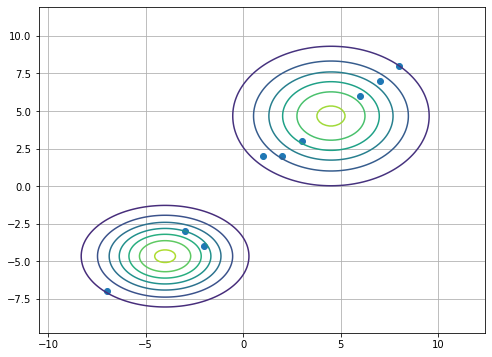

-------------------------------------------------------------


In [229]:
num_iterations = 3
num_mixture2 = 2
mixture_weight2 = [1/3] * num_mixture2

mean_params2 = np.array([[3,3], [-3,-3]], dtype = float)
cov_params2 = np.array([np.eye(2)] * num_mixture2)

# INSERT CODE HERE
gmm2 = GMM(mixture_weight2, mean_params2, cov_params2)
log_prob_list2 = gmm2.perform_em_iterations(data, num_iterations)

### T4. Plot the log likelihood of the model given the data after each EM step. Compare the log likelihood between using two mixtures and three mixtures. Which one has the better likelihood?

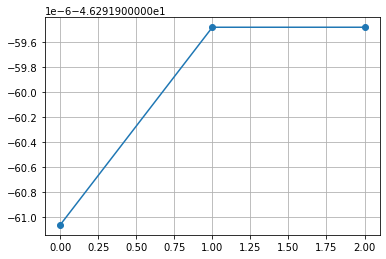

In [230]:
# TODO: Plot log_likelihood from T3
plt.plot([0,1,2],log_prob_list2,marker="o")
plt.grid(True)
plt.show()

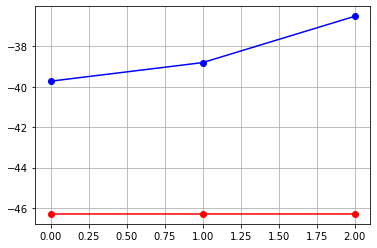

In [231]:
# TODO: Plot Comparision of log_likelihood from T1 and T3
plt.plot([0,1,2],log_prob_list,color="blue",label="T1",marker="o")
plt.plot([0,1,2],log_prob_list2,color="red",label="T3",marker="o")
plt.grid(True)
plt.show()

    ANS : T1 is better

# The face database

In [232]:
facedata_path = 'facedata.mat'

data = scipy.io.loadmat(facedata_path)
data_size = data['facedata'].shape

%matplotlib inline
data_size

(40, 10)

### Preprocess xf

In [233]:
xf = np.zeros((data_size[0], data_size[1], data['facedata'][0,0].shape[0], data['facedata'][0,0].shape[1]))
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i,j] = img_as_float(data['facedata'][i,j])

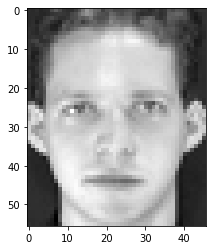

In [234]:
# Example: Ploting face image.
plt.imshow(xf[0,0], cmap = 'gray')
plt.show()

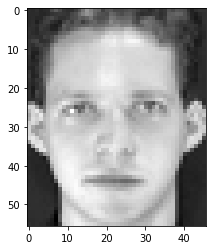

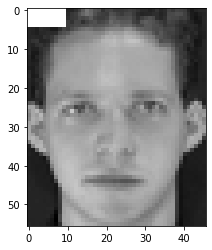

In [235]:
plt.imshow(xf[0,0],cmap="gray")
plt.show()
x_temp = np.copy(xf[0,0])
x_temp[0:5,0:10] = 1
# In float format, 1 is white
plt.imshow(x_temp,cmap="gray")
plt.show()

### T5. What is the Euclidean distance between xf[0,0] and xf[0,1]? What is the Euclidean distance between xf[0,0] and xf[1,0]? Does the numbers make sense? Do you think these numbers will be useful for face verification?

In [236]:
def L2_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

# Test L2_dist
def test_L2_dist():
    assert L2_dist(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0.0
    assert L2_dist(np.array([0, 0, 0]), np.array([1, 2, 3])) == np.sqrt(14)

test_L2_dist()

print('Euclidean distance between xf[0,0] and xf[0,1] is', L2_dist(xf[0,0], xf[0,1]))
print('Euclidean distance between xf[0,0] and xf[1,0] is', L2_dist(xf[0,0], xf[1,0]))
print('Euclidean distance between xf[0,0] and xf[0,0] is', L2_dist(xf[0,0], xf[0,0]))

Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492
Euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281
Euclidean distance between xf[0,0] and xf[0,0] is 0.0


[0,0] [0,1] [1,0]


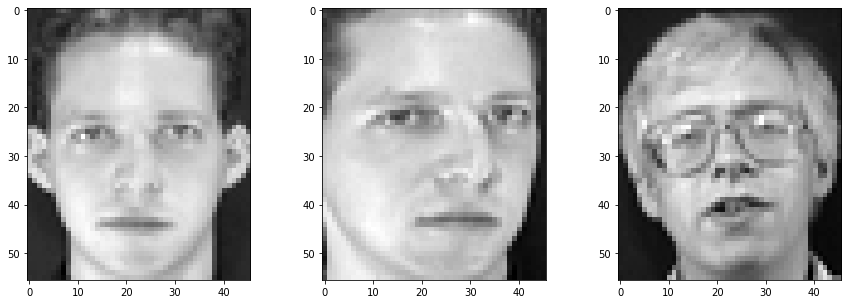

In [237]:
# TODO: Show why does the numbers make sense
fig, axes = plt.subplots(1, 3,figsize=(15, 5))

print("[0,0]","[0,1]","[1,0]")
axes[0].imshow(xf[0,0], cmap = 'gray')
axes[1].imshow(xf[0,1], cmap = 'gray')
axes[2].imshow(xf[1,0], cmap = 'gray')
plt.show()

    ANS :  Make sense. a lower Euclidean distance indicates a greater similarity.but ( xf[0,0] and xf[1,0] ) is closer than ( xf[0,0] and xf[0,1] ) which is the same person because xf[0,0] and xf[1,0] are in the same pose.

### T6. Write a function that takes in a set of feature vectors T and a set of feature vectors D, and then output the similarity matrix A. Show the matrix as an image. Use the feature vectors from the first 3 images from all 40 people for list T (in order x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ...x[39, 2]). Use the feature vectors from the remaining 7 images from all 40 people for list D (in order x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]). We will treat T as our training images and D as our testing images

In [238]:
def generate_similarity_matrix(A, B):
    similarity_matrix=np.zeros((A.shape[0],B.shape[0]))
    for y in range(similarity_matrix.shape[0]):
        for x in range(similarity_matrix.shape[1]):
            similarity_matrix[y][x]=L2_dist(A[y], B[x])
    return similarity_matrix

def test_generate_similarity_matrix():
    test_A = np.array([[1, 2],[3,4]])
    test_B = np.array([[1, 2], [5, 6], [7, 8]])
    expected_matrix = np.sqrt(np.array([[0, 32, 72], [8, 8, 32]]))
    assert (generate_similarity_matrix(test_A, test_B) == expected_matrix).all

test_generate_similarity_matrix()

T-D


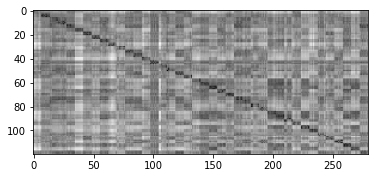

Example check


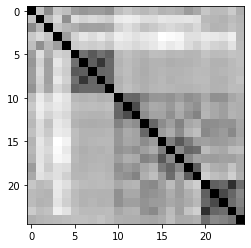

In [239]:
T=xf[:,:3].reshape(120,56*46)
D=xf[:,3:].reshape(280,56*46)

print("T-D")
similarity_matrix = generate_similarity_matrix(T,D)
plt.imshow(similarity_matrix, cmap = 'gray')
plt.show()

print("Example check")
tmp = np.array([xf[i, j] for i in range(5) for j in range(5)])
example_check = generate_similarity_matrix(tmp,tmp)
plt.imshow(example_check, cmap="gray")
plt.show()



### T7. From the example similarity matrix above, what does the black square between [5:10,5:10] suggest about the pictures from person number 2? What do the patterns from person number 1 say about the images from person 1?


        ANS :For person number 2: Each picture is very similar.
             For person number 1: Each picture is not very similar.
    

### T8. Write a function that takes in the similarity matrix created from the previous part, and a threshold t as inputs. The outputs of the function are the true positive rate and the false alarm rate of the face verification task (280 Test images, tested on 40 people, a total of 11200 testing per threshold). What is the true positive rate and the false alarm rate for t = 10?

In [240]:
def evaluate_performance(similarity_matrix, threshold):
    tp,fn,tn,fp=0,0,0,0
    count=0
    for x in range(similarity_matrix.shape[1]):
        for y in range(40):
            result=min(similarity_matrix[3*y:3*y+3,x])
            if(int(x/7)==y):
                count+=1
                if(result<threshold):
                    tp+=1
                else:
                    fn+=1
            else:
                if(result<threshold):
                    fp+=1
                else:
                    tn+=1
                

    true_pos_rate=tp/count
    false_neg_rate=fn/count
    false_pos_rate=fp/(11200-count)
    true_neg_rate=tn/(11200-count)
    # print(true_pos_rate,true_neg_rate)
    return true_pos_rate, false_pos_rate , false_neg_rate ,true_neg_rate

# Quick check     ??????????????
# (true_pos_rate, false_neg_rate) should be (0.9928571428571429, 0.33507326007326005)
tpr,fnr,tnr,fpr=evaluate_performance(similarity_matrix,9.5)
print(tpr,fnr,tnr,fpr)

0.9928571428571429 0.33507326007326005 0.007142857142857143 0.6649267399267399


        ANS:

### T9. Plot the RoC curve for this simple verification system. What should be the minimum threshold to generate the RoC curve? What should be the maximum threshold? Your RoC should be generated from at least 1000 threshold levels equally spaced between the minimum and the maximum. (You should write a function for this).

In [241]:
def calculate_roc(input_mat):
    tpr_list, fpr_list,fnr_list,tnr_list=[],[],[],[]
    t= np.linspace(np.min(input_mat), np.max(input_mat), 1000)
    for i in range(len(t)):
        tpr,fpr,fnr,tnr=evaluate_performance(input_mat,t[i])
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        fnr_list.append(fnr)
        tnr_list.append(tnr)
    tpr_list=np.array(tpr_list)
    fpr_list=np.array(fpr_list)
    fnr_list=np.array(fnr_list)
    tnr_list=np.array(tnr_list)
    return tpr_list, fpr_list,fnr_list,tnr_list

tpr_list,fpr_list,fnr_list,tnr_list=np.array([]),np.array([]),np.array([]),np.array([])

def plot_roc(input_mat):
    global tpr_list, fpr_list,fnr_list,tnr_list
    tpr_list,fpr_list,fnr_list,tnr_list=calculate_roc(input_mat)
    plt.plot(fpr_list,tpr_list,"-",color="blue")
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.show()

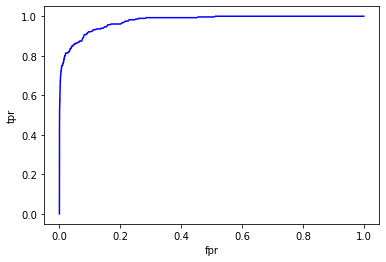

In [242]:
# INSERT CODE HERE
plot_roc(similarity_matrix)


    ANS:

### T10. What is the EER (Equal Error Rate)? What is the recall rate at 0.1% false alarm rate? (Write this in the same function as the previous question)



In [243]:
# You can add more parameter(s) to the function in the previous question.
print("EER :",tpr_list[np.argmin(np.abs(fpr_list - fnr_list))])
print("Recall at 0.001 false neg",tpr_list[np.argmin(np.abs(fpr_list - 0.001))])
# EER should be either 0.9071428571428571 or 0.9103759398496248 depending on method.
# Recall rate at 0.1% false alarm rate should be 0.5428571428571428.

EER : 0.9071428571428571
Recall at 0.001 false neg 0.5428571428571428


    ANS:

### T11. Compute the mean vector from the training images. Show the vector as an image (use numpy.reshape()). This is typically called the meanface (or meanvoice for speech signals). You answer should look exactly like the image shown below.

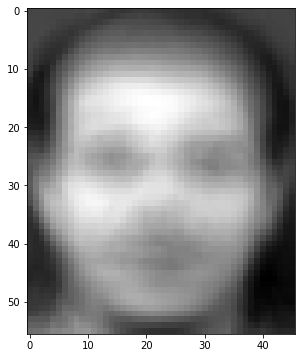

In [244]:
meanface = np.mean(T.reshape(120,56,46),axis=0)
plt.figure(figsize=(8, 6))
plt.imshow(meanface,cmap="gray")
plt.show()

### T12. What is the size of the covariance matrix? What is the rank of the covariance matrix?


In [245]:
# TODO: Find the size and the rank of the covariance matrix.
diff=(T-meanface.reshape(46*56)).T
cov=np.matmul(diff,diff.T)
print("cov_size :",cov.shape)
print("cov_rank :",np.linalg.matrix_rank(cov))

cov_size : (2576, 2576)
cov_rank : 119


### T13. What is the size of the Gram matrix? What is the rank of Gram matrix? If we compute the eigenvalues from the Gram matrix, how many non- zero eigenvalues do we expect to get?

In [246]:
# TODO: Compute gram matrix.
gram_matrix = np.matmul(diff.T,diff)
print("gram_size :",gram_matrix.shape)
print("gram_rank_rank :",np.linalg.matrix_rank(gram_matrix))
print("count eigen_value (> 0) :",(np.linalg.eigvals(gram_matrix)>0).sum())

gram_size : (120, 120)
gram_rank_rank : 119
count eigen_value (> 0) : 119


## T14. Is the Gram matrix also symmetric? Why?


    ANS: Yes,it is. because Gram Matrix is  the inner product between X ans X.T

### T15. Compute the eigenvectors and eigenvalues of the Gram matrix, v 0 and λ. Sort the eigenvalues and eigenvectors in descending order so that the first eigenvalue is the highest, and the first eigenvector corresponds to the best direction. How many non-zero eigenvalues are there? If you see a very small value, it is just numerical error and should be treated as zero.




In [247]:
def calculate_eigenvectors_and_eigenvalues(matrix):
    evalues, evectors = LA.eigh(matrix)
    tmp=[]
    for i in range(len(evalues)):
        tmp.append([evalues[i],evectors[i]])
    tmp=sorted(tmp,reverse=True)
    eigenvalues,eigenvectors=[],[]
    for p in tmp:
        if(p[0]>0):
            eigenvalues.append(p[0])
            eigenvectors.append(p[1])
    eigenvalues=np.array(eigenvalues)
    eigenvectors=np.array(eigenvectors)
    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)

def test_eigenvalues_eigenvectors():
    # Dot product of an eigenvector pair should equal to zero.
    assert np.round(eigenvectors[10].dot(eigenvectors[20]), 10) == 0.0

    # Check if eigenvalues are sorted.
    assert list(eigenvalues) == sorted(eigenvalues, reverse = True)

test_eigenvalues_eigenvectors()

    ANS:

### T16. Plot the eigenvalues. Observe how fast the eigenvalues decrease. In class, we learned that the eigenvalues is the size of the variance for each eigenvector direction. If I want to keep 95% of the variance in the data, how many eigenvectors should I use?

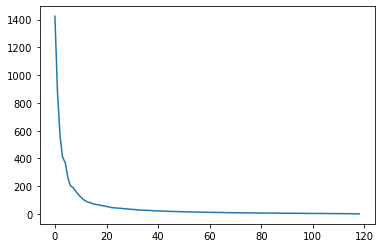

In [248]:
# INSERT CODE HERE
plt.plot(np.arange(len(eigenvalues)),eigenvalues,"-")
plt.show()


    ANS:

### T17. Compute $\vec{v}$ . Don’t forget to renormalize so that the norm of each vector is 1 (you can use numpy.linalg.norm). Show the first 10 eigenvectors as images. Two example eigenvectors are shown below. We call these images eigenfaces (or eigenvoice for speech signals).

In [249]:
# # TODO: Compute v, then renormalize it.
v = np.matmul(diff,eigenvectors.T)
v/=np.linalg.norm(v, axis=1).reshape(-1, 1)
v=v.T

In [250]:
def test_eignevector_cov_norm(v):
    assert (np.round(np.linalg.norm(v, axis=0), 1) == 1.0).all()

test_eignevector_cov_norm(v)

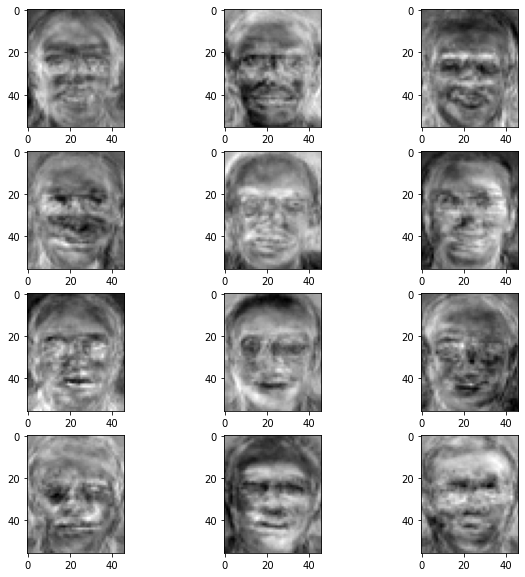

In [251]:
# TODO: Show the first 10 eigenvectors as images.
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

for i in range(12):
  axs[i//3][i%3].imshow(v[i].reshape((56,46)), cmap="gray")
plt.show()

### T18. From the image, what do you think the first eigenvector captures? What about the second eigenvector? Look at the original images, do you think biggest variance are capture in these two eigenvectors?

    ANS:

### T19. Find the projection values of all images. Keep the first k = 10 projection values. Repeat the simple face verification system we did earlier using these projected values. What is the EER and the recall rate at 0.1% FAR?

In [252]:
def calculate_projection_vectors(matrix, meanface, v):
    """
    TODO: Find the projection vectors on v from given matrix and meanface.
    """
    
    projection_vectors=[]
    for i in range(matrix.shape[0]):
        diff=matrix[i]-meanface.reshape(46*56)
        projection_vectors.append(np.dot(v,diff))
    projection_vectors=np.array(projection_vectors)
    return projection_vectors

In [253]:
# TODO: Get projection vectors of T and D, then Keep first k projection values.
k = 119#???????????????
T_reduced = calculate_projection_vectors(T,meanface,v)
D_reduced = calculate_projection_vectors(D,meanface,v)
print(T.shape)
print(D.shape)
print(T_reduced.shape)
print(D_reduced.shape)

def test_reduce_dimension():
    assert T_reduced.shape[-1] == k
    assert D_reduced.shape[-1] == k

test_reduce_dimension()

(120, 2576)
(280, 2576)
(120, 119)
(280, 119)


T_reduced-D_reduced


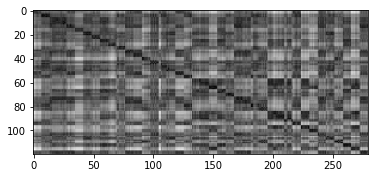

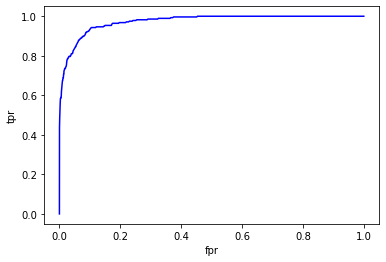

In [254]:
# TODO: Get similarity matrix of T_reduced and D_reduced
print("T_reduced-D_reduced")
similarity_matrix = generate_similarity_matrix(T_reduced,D_reduced)
plt.imshow(similarity_matrix, cmap = 'gray')
plt.show()

plot_roc(similarity_matrix)

In [255]:
# TODO: Find EER and the recall rate at 0.1% FAR.

    ANS:

### T20. What is the k that gives the best EER? Try k = 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.


In [256]:
# INSERT CODE HERE

    ANS:

### T21. In order to assure that $S_W$ is invertible we need to make sure that $S_W$ is full rank. How many PCA dimensions do we need to keep in order for $S_W$ to be full rank? (Hint: How many dimensions does $S_W$ have? In order to be of full rank, you need to have the same number of linearly independent factors)

    ANS:

In [257]:
# TODO: Define dimension of PCA.
n_dim = ...

# TODO: Find PCA of T and D with n_dim dimension.

### T22. Using the answer to the previous question, project the original in- put to the PCA subspace. Find the LDA projections. To find the inverse, use −1 numpy.linalg.inv. Is $S_W$ $S_B$ symmetric? Can we still use numpy.linalg.eigh? How many non-zero eigenvalues are there?


In [258]:
# TODO: Find the LDA projection.

In [259]:
# TODO: Find how many non-zero eigenvalues there are.

    ANS:

### T23. Plot the first 10 LDA eigenvectors as images (the 10 best projections). Note that in this setup, you need to convert back to the original image space by using the PCA projection. The LDA eigenvectors can be considered as a linear combination of eigenfaces. Compare the LDA projections with the PCA projections.

In [260]:
# INSERT CODE HERE

### T24. The combined PCA+LDA projection procedure is called fisherface. Calculate the fisherfaces projection of all images. Do the simple face verification experiment using fisherfaces. What is the EER and recall rate at 0.1% FAR?

In [261]:
# INSERT CODE HERE

    ANS:

### T25.Plot the RoC of all three experiments (No projection, PCA, andFisher) on the same axes. Compare and contrast the three results. Submit yourwriteup and code on MyCourseVille.

In [262]:
# INSERT CODE HERE

    ANS: